# Ridge and Lasso Regression

**Objective**

Fit, predict, and cross-validate these two models.

#### 1) Load Data and Create Test Set

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
housing = pd.read_csv("housing_clean_with_X1X2.csv") # Read in the data, csv
housing.head(5) # Display the first # of rows of the DataFrame

,median_house_value,ocean_proximity_enc,longitude,latitude,housing_median_age,median_income,rooms_per_bedroom,rooms_per_household,people_per_household,X1,X2
0,452600,3,-122.23,37.88,41,8.3252,6.821705,6.984127,2.555556,4.407574,3.681418
1,358500,3,-122.22,37.86,21,8.3014,6.418626,6.238137,2.109842,6.973484,7.630216
2,352100,3,-122.24,37.85,52,7.2574,7.721053,8.288136,2.802260,9.889935,-0.932354
3,341300,3,-122.25,37.85,52,5.6431,5.421277,5.817352,2.547945,0.729881,6.846393
4,342200,3,-122.25,37.85,52,3.8462,5.810714,6.281853,2.181467,6.668964,3.878034


In [3]:
housing.shape # Dimensions of Panda/NumPy type objects
housing.info() # Prints concise summary of a DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20417 entries, 0 to 20416
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   median_house_value    20417 non-null  int64  
 1   ocean_proximity_enc   20417 non-null  int64  
 2   longitude             20417 non-null  float64
 3   latitude              20417 non-null  float64
 4   housing_median_age    20417 non-null  int64  
 5   median_income         20417 non-null  float64
 6   rooms_per_bedroom     20417 non-null  float64
 7   rooms_per_household   20417 non-null  float64
 8   people_per_household  20417 non-null  float64
 9   X1                    20417 non-null  float64
 10  X2                    20417 non-null  float64
dtypes: float64(8), int64(3)
memory usage: 1.7 MB


In [4]:
X = housing.drop(["median_house_value"], axis = 1) # Remove the response from the other predictor variables
y = housing[["median_house_value"]] # Only keep the response variable

X.shape # Dimensions of Panda/NumPy type objects
y.shape # Dimensions of Panda/NumPy type objects

(20417, 1)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.95, random_state = 12)
# X and y are the input features (predictors) and target (response) variable separately
#  test_size parameter is the porprotion of the data allocated in the test set
#   random_state parameter initializes the random number generator to produce the same results each run

#### 2) Define Models

In [7]:
housing.describe() # Computes summary statistics for DataFrame

,median_house_value,ocean_proximity_enc,longitude,latitude,housing_median_age,median_income,rooms_per_bedroom,rooms_per_household,people_per_household,X1,X2
count,20417.000000,20417.000000,20417.000000,20417.000000,20417.000000,20417.000000,20417.000000,20417.000000,20417.000000,20417.000000,20417.000000
mean,206867.965568,1.166136,-119.570543,35.631614,28.634912,3.870970,4.984592,5.400583,2.937114,4.980824,5.032444
std,115431.096022,1.420546,2.003755,2.135635,12.591100,1.899041,1.171702,1.885913,0.944461,2.311603,4.010634
min,14999.000000,0.000000,-124.350000,32.540000,1.000000,0.499900,1.000000,0.846154,0.692308,-3.409768,-11.182254
25%,119500.000000,0.000000,-121.800000,33.930000,18.000000,2.563700,4.169683,4.441038,2.429238,3.406365,2.320378
50%,179800.000000,1.000000,-118.490000,34.260000,29.000000,3.536300,4.921739,5.230380,2.817610,4.969657,5.050139
75%,264700.000000,1.000000,-118.010000,37.710000,37.000000,4.743700,5.700364,6.051613,3.281481,6.558337,7.733056
max,500001.000000,4.000000,-114.310000,41.950000,52.000000,15.000100,10.000000,47.515152,41.214286,13.331572,20.305780


In [8]:
from sklearn.linear_model import Ridge
# A regularization technique that adds a penalty term to the sum of squared errors in the linear regression objective function.

In [9]:
ridge_reg = Ridge(alpha = 0.1, fit_intercept = True) # Creates a Ridge instance
# alpha: Controls the strength of the penalty, with larger values of alpha resulting in greater regularization.
# A smaller value of alpha allows the model to fit the training data more closely, but may lead to overfitting.
#  fit_intercept = True: Intercept included in the regression model

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

ridge_reg_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge_reg', ridge_reg) # Make sure the name is exactly the same (STEP for set_params)
])

# Pipeline consists of two steps:
#  1. StandardScaler: This step applies the standard scaling technique to the input features.
#  Standard scaling scales each feature to have zero mean and unit variance, which is a common preprocessing step for many machine learning algorithms.
#  2. ridge_reg: Used for linear regression with L2 regularization

In [11]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.1, fit_intercept = True) # Creates a Lasso instance
# alpha: Controls the strength of the penalty, with larger values of alpha resulting in greater regularization.
# A smaller value of alpha allows the model to fit the training data more closely, but may lead to overfitting.
#  fit_intercept = True: Intercept included in the regression model

In [12]:
lasso_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', lasso)
])

# Pipeline consists of two steps:
#  1. StandardScaler: This step applies the standard scaling technique to the input features.
#  Standard scaling scales each feature to have zero mean and unit variance, which is a common preprocessing step for many machine learning algorithms.
#  2. lasso_reg: A linear regression technique that performs L1 regularization to shrink some of the coefficients towards zero, effectively performing feature selection.

#### 3) Fit Ridge Regression

In [13]:
ridge_reg_pipe.fit(X_train, y_train) # Fitting the Ridge regression model to training data

Pipeline(steps=[('scaler', StandardScaler()), ('ridge_reg', Ridge(alpha=0.1))])

In [14]:
from sklearn.metrics import mean_squared_error
y_train_pred = ridge_reg_pipe.predict(X_train) # Makes predictions on the test set
print("RMSE on training data:", mean_squared_error(y_train, y_train_pred, squared = False)) # Minimize error
# np.sqrt(mean_squared_error(y_train, y_train_pred)) ... same output for the code above
# Ridge is a linear regression, 1 linear hyperplane

# Takes two parameters: the predicted target values and the true target values, and returns the mean squared error between the two arrays.
#  The mean squared error is computed as the average of the squared differences between the predicted and true values.
#   mean_squared_error(y_true, y_pred)

y_test_pred = ridge_reg_pipe.predict(X_test) # Makes predictions on the test set
print("RMSE on test data:", mean_squared_error(y_test, y_test_pred, squared = False)) # Minimize error
# Error larger on testing MSE because linear regression is approximately predicting the test values
# Penalizes values of beta and pushes them down

RMSE on training data: 67636.08948270889
RMSE on test data: 69641.95294583413


#### 4) Plot Ridge Regression Coefficients

In [15]:
ridge_reg_grid = 10 ** np.linspace(-2, 6, num = 20) # Geometrically linear spaced data (-2 to 6)
# ridge_reg_grid = np.geomspace(1e-2, 1e6, num = 20) ... same output for the code above
# np.logspace(-2, 6) ... same output for the code above

In [16]:
ridge_reg_grid # Array that contains different values of regularization parameter 'alpha'
ridge_reg_pipe.set_params(ridge_reg__alpha = ridge_reg_grid[0]) # Sets the value of alpha for the Ridge Regression model inside the pipeline to be the first value in ridge_reg_grid.
ridge_reg_pipe.fit(X_train, y_train) # Fits the Ridge Regression model

Pipeline(steps=[('scaler', StandardScaler()), ('ridge_reg', Ridge(alpha=0.01))])

In [17]:
coefs = [] # Empty list
for alpha in ridge_reg_grid: # Loop though all possibilities of alpha
    #print(alpha)
    ridge_reg_pipe.set_params(ridge_reg__alpha = alpha) # This is the step is with __, changing alpha
    ridge_reg_pipe.fit(X_train, y_train) # Fits the Ridge Regression model
    coefs.append(ridge_reg_pipe.named_steps['ridge_reg'].coef_[0]) # Saves the coefficient values for the Ridge Regression model inside the pipeline to the list

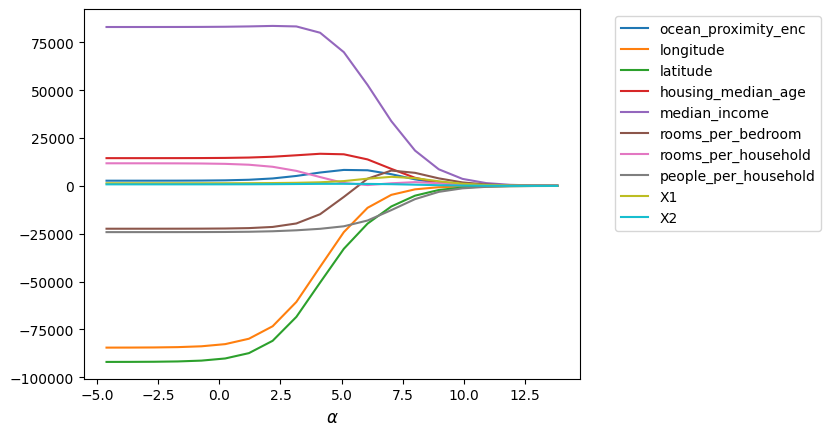

In [18]:
plt.plot(np.log(ridge_reg_grid), coefs, ); # Creates a line plot of the coefficients again the log of alpha paramaters
plt.xlabel("$\\alpha$", fontsize = 12) # Label x-axis with font size
plt.legend(X_train.columns, loc = "upper right", bbox_to_anchor = (1.5, 1)); # Include a legend with specifications
plt.show()
# Choice of alpha was good, in the end they converge to 0. Penalized to 0 if the alpha was larger
# x1 and x2 does not seem very useful
# Purple line converges slowly to 0. Lasso goes to 0 and Ridge gets closer to 0

#### 5) Fit Lasso Regression

In [19]:
lasso_pipe.fit(X_train, y_train) # Fitting the Lasso regression model to training data

Pipeline(steps=[('scaler', StandardScaler()), ('lasso', Lasso(alpha=0.1))])

In [20]:
from sklearn.metrics import mean_squared_error
y_train_pred = lasso_pipe.predict(X_train) # Makes predictions on the test set
print("RMSE on training data:", mean_squared_error(y_train, y_train_pred, squared = False)) # Minimize error
# np.sqrt(mean_squared_error(y_train, y_train_pred)) ... same output for the code above
# Ridge is a linear regression, 1 linear hyperplane

# Takes two parameters: the predicted target values and the true target values, and returns the mean squared error between the two arrays.
#  The mean squared error is computed as the average of the squared differences between the predicted and true values.
#   mean_squared_error(y_true, y_pred)

y_test_pred = lasso_pipe.predict(X_test) # Makes predictions on the test set
print("RMSE on test data:", mean_squared_error(y_test, y_test_pred, squared = False)) # Minimize error
# Error larger on testing MSE because linear regression is approximately predicting the test values
# Penalizes values of beta and pushes them down

RMSE on training data: 67636.07112819422
RMSE on test data: 69642.05855737998


#### 6) Plot Lasso Coefficients

In [21]:
lasso_grid = 10**np.linspace(0, 6, num=30) # Geometrically linear spaced data (-2 to 6)
# lasso_grid = np.geomspace(1, 1e6, num=30) ... same output for the code above
# lasso_grid = np.logspace(-2, 6) ... same output for the code above

In [22]:
coefs = [] # Empty list
for alpha in lasso_grid: # Loop though all possibilities of alpha
    lasso_pipe.set_params(lasso__alpha = alpha) # This is the step is with __, changing alpha
    lasso_pipe.fit(X_train, y_train) # Fits the Lasso Regression model
    coefs.append(lasso_pipe.named_steps['lasso'].coef_) # Saves the coefficient values for the Lasso Regression model inside the pipeline to the list

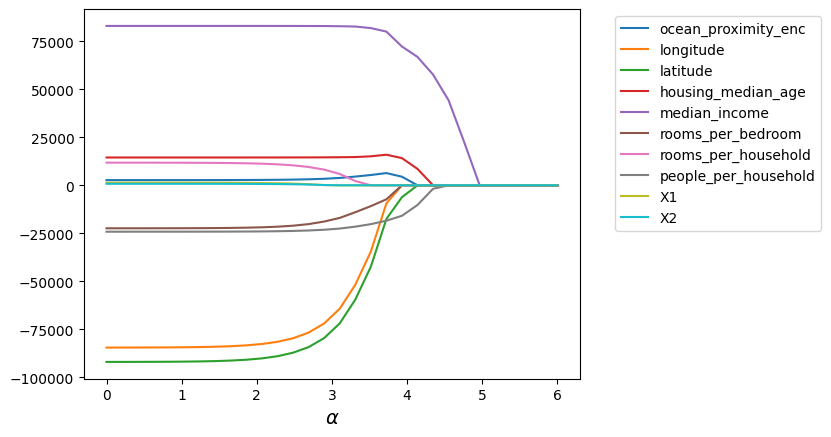

In [23]:
plt.plot(np.log10(lasso_grid), coefs) # Creates a line plot of the coefficients again the log of alpha paramaters
plt.xlabel("$\\alpha$", fontsize = 14); # Label x-axis with font size
plt.legend(X_train.columns, loc = 'upper right', bbox_to_anchor = (1.5, 1)) # Include a legend with specifications

#### 7) Prepare Cross-validation

In [24]:
from sklearn.model_selection import KFold
folds = KFold(n_splits = 10, random_state = 42, shuffle = True) # The data will be randomly shuffled before the cross-validation splits are created.
# This helps to prevent bias due to any inherent order in the data.

#### 8) Cross-validation for Ridge

In [25]:
ridge_param_grid = {"ridge_reg__alpha" : ridge_reg_grid} # Create hyperparameter, dictionary

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
ridgeCV = GridSearchCV(estimator = ridge_reg_pipe, # Specifies the estimator to be tuned, which is the ridge_reg_pipe pipeline object containing the Ridge regression model
                       param_grid = ridge_param_grid, # Parameter specifies the grid of hyperparameters to search over. It should be a dictionary or a list of dictionaries containing the hyperparameters to be tuned and their corresponding values.
                       scoring = "neg_mean_squared_error", # Parameter specifies the metric to be used for evaluating the performance of the model.
                       cv = folds) # Specifies the cross-validation strategy to be used.

In [28]:
ridgeCV.fit(X_train, y_train) # Fit the Ridge model on training set
# See that ridge and lasso work with small data sets

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('ridge_reg', Ridge(alpha=1000000.0))]),
             param_grid={'ridge_reg__alpha': array([1.00000000e-02, 2.63665090e-02, 6.95192796e-02, 1.83298071e-01,
       4.83293024e-01, 1.27427499e+00, 3.35981829e+00, 8.85866790e+00,
       2.33572147e+01, 6.15848211e+01, 1.62377674e+02, 4.28133240e+02,
       1.12883789e+03, 2.97635144e+03, 7.84759970e+03, 2.06913808e+04,
       5.45559478e+04, 1.43844989e+05, 3.79269019e+05, 1.00000000e+06])},
             scoring='neg_mean_squared_error')

In [29]:
pd.DataFrame(ridgeCV.cv_results_).head(5) # Contains results from CV

# mean_test_score: The mean accuracy score of the KNN classifier on the test data for a particular combination of hyperparameters.
#  mean_train_score: The mean accuracy score of the KNN classifier on the training data for a particular combination of hyperparameters.
#   std_test_score: The standard deviation of the accuracy score of the KNN classifier on the test data for a particular combination of hyperparameters.
#    std_train_score: The standard deviation of the accuracy score of the KNN classifier on the training data for a particular combination of hyperparameters.
#     params: A dictionary of the hyperparameters used for that particular combination.

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ridge_reg__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004574,0.003355,0.002049,0.003486,0.01,{'ridge_reg__alpha': 0.01},-5.644469e+09,-4.638923e+09,-7.962666e+09,-4.723049e+09,-4.479162e+09,-2.946510e+09,-4.748250e+09,-4.135493e+09,-3.448923e+09,-4.497949e+09,-4.722539e+09,1.287894e+09,7
1,0.003023,0.004149,0.003601,0.003704,0.026367,{'ridge_reg__alpha': 0.026366508987303583},-5.644290e+09,-4.638754e+09,-7.962858e+09,-4.723164e+09,-4.479401e+09,-2.946344e+09,-4.748286e+09,-4.135310e+09,-3.448960e+09,-4.497838e+09,-4.722520e+09,1.287955e+09,6
2,0.004776,0.004352,0.001485,0.002868,0.069519,{'ridge_reg__alpha': 0.06951927961775606},-5.643820e+09,-4.638310e+09,-7.963363e+09,-4.723465e+09,-4.480030e+09,-2.945908e+09,-4.748381e+09,-4.134830e+09,-3.449059e+09,-4.497548e+09,-4.722471e+09,1.288117e+09,5
3,0.003341,0.004305,0.002154,0.003310,0.183298,{'ridge_reg__alpha': 0.18329807108324356},-5.642588e+09,-4.637155e+09,-7.964693e+09,-4.724264e+09,-4.481691e+09,-2.944770e+09,-4.748636e+09,-4.133574e+09,-3.449327e+09,-4.496787e+09,-4.722349e+09,1.288542e+09,4
4,0.004249,0.004243,0.001609,0.001919,0.483293,{'ridge_reg__alpha': 0.4832930238571752},-5.639396e+09,-4.634209e+09,-7.968176e+09,-4.726388e+09,-4.486073e+09,-2.941841e+09,-4.749337e+09,-4.130342e+09,-3.450074e+09,-4.494825e+09,-4.722066e+09,1.289645e+09,2


In [30]:
# Choose best model that minimizes cv_err/according to the 1-SE error
mean_scores = -ridgeCV.cv_results_["mean_test_score"]
# The negative sign is used because the cross_val_score function in scikit-learn returns negative scores (higher is better),
# but we want to work with positive scores (lower is better) for the MSE.
std_scores = ridgeCV.cv_results_["std_test_score"] / np.sqrt(ridgeCV.n_splits_) # Variability in the estimated test set MSE due to sampling from the data.
alphas = ridgeCV.cv_results_["param_ridge_reg__alpha"].data # An array of the different values of alpha that were tested

index_best = np.argmin(mean_scores) # Index of the alpha value with the lowest MSE estimate, find minimum then the index (arg)
min_alpha_ridge = alphas[index_best] # The value of alpha that corresponds to this minimum mean test score is then obtained by indexing the alphas array using index_best

threshold_ridge = mean_scores[index_best] + std_scores[index_best] # Threshold that the mean test score should not exceed, in order to consider the corresponding alpha value as a candidate for selection.
one_std_rule_alpha_ridge = np.max(alphas[mean_scores <= threshold_ridge]) # Maximum value of alpha from among the set of alpha values for which the mean test score is less than or equal to the threshold_ridge.

print("Minimum alpha:", min_alpha_ridge)
print("1-SD alpha:", one_std_rule_alpha_ridge)
print("Best score for ridge:", np.sqrt(np.min(mean_scores)))

Minimum alpha: 1.2742749857031335
1-SD alpha: 61.584821106602604
Best score for ridge: 68713.9034607041


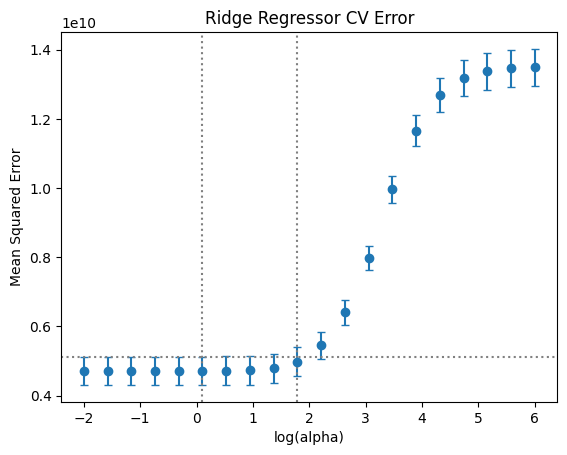

In [31]:
plt.errorbar(np.log10(ridge_reg_grid), y = mean_scores, yerr = std_scores, fmt = 'o', capsize = 3)
# yerr: Parameter specifies the size of the error bars.
# fmt: Specifies that the data points should be plotted as dots.
# capsize: Length of the error bar caps in points.

plt.axvline(np.log10(min_alpha_ridge), ls = 'dotted', color = "grey") # Vertical line at the alpha yielding minimum CV MSE
plt.axvline(np.log10(one_std_rule_alpha_ridge), ls = 'dotted', color = "grey")  # Vertical line at best alpha value according to 1 std err rule
plt.axhline(threshold_ridge, ls = 'dotted', color = "grey") # Create horizontal line as the threshold

plt.title("Ridge Regressor CV Error") # Label the plot with a title
plt.xlabel('log(alpha)') # Label the x-axis
plt.ylabel('Mean Squared Error') # Label the y-axis
plt.show()

#### 9) Cross-validaton for Lasso

In [32]:
params_lasso = {"lasso__alpha" : lasso_grid} # Create hyperparameter, dictionary

In [33]:
lassoCV = GridSearchCV(estimator = lasso_pipe, # Specifies the estimator to be tuned, which is the ridge_reg_pipe pipeline object containing the Lasso regression model
                       param_grid = params_lasso, # Parameter specifies the grid of hyperparameters to search over. It should be a dictionary or a list of dictionaries containing the hyperparameters to be tuned and their corresponding values.
                       scoring = "neg_mean_squared_error",  # Parameter specifies the metric to be used for evaluating the performance of the model.
                       cv = folds)  # Specifies the cross-validation strategy to be used.

In [34]:
lassoCV.fit(X_train, y_train) # Fit the Ridge model on training set
# See that ridge and lasso work with small data sets

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lasso', Lasso(alpha=1000000.0))]),
             param_grid={'lasso__alpha': array([1.00000000e+00, 1.61026203e+00, 2.59294380e+00, 4.17531894e+00,
       6.72335754e+00, 1.08263673e+01, 1.74332882e+01, 2.80721620e+01,
       4.52035366e+01, 7.27895384e+01, 1.17210230e+02, 1.88739182e+02,
       3.03919538e+02, 4.89390092e+02, 7.88046282e+02, 1.26896100e+03,
       2.04335972e+03, 3.29034456e+03, 5.29831691e+03, 8.53167852e+03,
       1.37382380e+04, 2.21221629e+04, 3.56224789e+04, 5.73615251e+04,
       9.23670857e+04, 1.48735211e+05, 2.39502662e+05, 3.85662042e+05,
       6.21016942e+05, 1.00000000e+06])},
             scoring='neg_mean_squared_error')

In [35]:
# Choose best model that minimizes cv_err/according to the 1-SE error
mean_scores = -lassoCV.cv_results_["mean_test_score"]
# The negative sign is used because the cross_val_score function in scikit-learn returns negative scores (higher is better),
# but we want to work with positive scores (lower is better) for the MSE.
std_scores = lassoCV.cv_results_["std_test_score"] / np.sqrt(lassoCV.n_splits_) # Variability in the estimated test set MSE due to sampling from the data.
alphas = lassoCV.cv_results_["param_lasso__alpha"].data # An array of the different values of alpha that were tested

index_best = np.argmin(mean_scores) # Index of the alpha value with the lowest MSE estimate, find minimum then the index (arg)
min_alpha_lasso = alphas[index_best] # The value of alpha that corresponds to this minimum mean test score is then obtained by indexing the alphas array using index_best

threshold_lasso = mean_scores[index_best] + std_scores[index_best] # Threshold that the mean test score should not exceed, in order to consider the corresponding alpha value as a candidate for selection.
one_std_rule_alpha_lasso = np.max(alphas[mean_scores <= threshold_lasso]) # Maximum value of alpha from among the set of alpha values for which the mean test score is less than or equal to the threshold_lasso.

print("Minimum alpha:", min_alpha_lasso)
print("1-SD alpha:", one_std_rule_alpha_lasso)
print("Best score for lasso:", np.sqrt(np.min(mean_scores)))

Minimum alpha: 303.9195382313198
1-SD alpha: 3290.3445623126677
Best score for lasso: 68695.27606312264


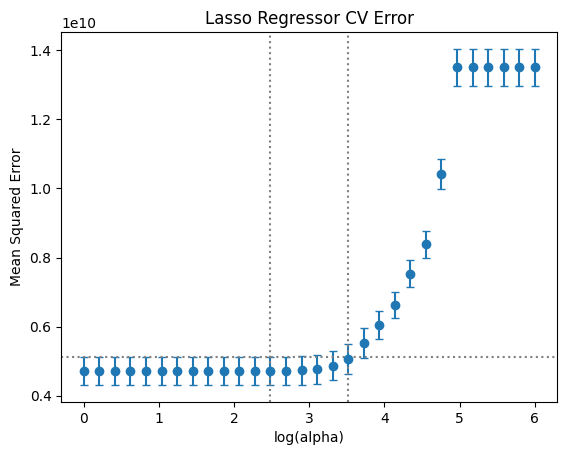

In [36]:
plt.errorbar(x = np.log10(lasso_grid), y = mean_scores, yerr = std_scores, fmt = 'o', capsize = 3)
# yerr: Parameter specifies the size of the error bars.
# fmt: Specifies that the data points should be plotted as dots.
# capsize: Length of the error bar caps in points.

plt.axvline(np.log10(min_alpha_lasso), ls = 'dotted', color = "grey") # Vertical line at the alpha yielding minimum CV MSE
plt.axvline(np.log10(one_std_rule_alpha_lasso), ls = 'dotted', color = "grey")  # Vertical line at best alpha value according to 1 std err rule
plt.axhline(threshold_lasso, ls = 'dotted', color = "grey") # Create horizontal line as the threshold

plt.title("Lasso Regressor CV Error") # Label the plot with a title
plt.xlabel('log(alpha)') # Label the x-axis
plt.ylabel('Mean Squared Error') # Label the y-axis
plt.show()

#### 10) Compute Performance Between the Two Models

In [37]:
# Refit best ridge on whole training data and evaluate on test
ridge_reg_pipe.set_params(ridge_reg__alpha = one_std_rule_alpha_ridge)
ridge_reg_pipe.fit(X_train, y_train)

y_test_pred = ridge_reg_pipe.predict(X_test) # Use the Ridge model to predict on test set
mean_squared_error(y_test, y_test_pred, squared = False)
# Takes two parameters: the predicted target values and the true target values, and returns the mean squared error between the two arrays.
#  The mean squared error is computed as the average of the squared differences between the predicted and true values.
#   mean_squared_error(y_true, y_pred)

71436.87849983232

In [38]:
# Refit best lasso on whole training data and evaluate on test
lasso_pipe.set_params(lasso__alpha = one_std_rule_alpha_lasso)
lasso_pipe.fit(X_train, y_train)

y_test_pred = lasso_pipe.predict(X_test) # Use the Lasso model to predict on test set
mean_squared_error(y_test, y_test_pred, squared = False)
# Takes two parameters: the predicted target values and the true target values, and returns the mean squared error between the two arrays.
#  The mean squared error is computed as the average of the squared differences between the predicted and true values.
#   mean_squared_error(y_true, y_pred)

71748.85385235885

In [39]:
# Show predictor that are kept/ignored by lasso
X.columns[lasso_pipe.named_steps['lasso'].coef_ != 0].to_list() # Selecting the column names of a Pandas DataFrame X that have non-zero coefficients in a Lasso regression model
X.columns[lasso_pipe.named_steps['lasso'].coef_ == 0].to_list() # Selecting the column names of a Pandas DataFrame X that have zero coefficients in a Lasso regression model

['rooms_per_household', 'X1', 'X2']

In [40]:
ridge_reg_pipe.named_steps['ridge_reg'].coef_ # Accessing the coefficients of a Ridge regression model.
# Ridge regression is a type of linear regression that includes a penalty term to prevent overfitting.
# The coef_ attribute returns an array of coefficients, one for each feature in the dataset, that minimize the sum of squared errors between the predicted and actual values of the target variable.
lasso_pipe.named_steps['lasso'].coef_ # Accessing the coefficients of a Lasso regression model.
# Lasso regression is another type of linear regression that includes a penalty term to prevent overfitting.
# However, unlike Ridge regression, Lasso regression uses the L1 penalty, which has the effect of setting some of the coefficients to exactly zero.
# The coef_ attribute returns an array of coefficients, one for each feature in the dataset, that minimize the sum of squared errors subject to the constraint that the absolute value of each coefficient is less than or equal to a specified constant

array([  5364.57662992, -34529.32833244, -42404.10654704,  15101.82587984,
        81918.41873228, -10844.70949939,      0.        , -20239.78943827,
            0.        ,      0.        ])

In [41]:
# Linear regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression() # Creates an instance of the LinearRegression class
lin_reg.fit(X_train, y_train) # Fits the linear regression model to the training data

y_test_pred = lin_reg.predict(X_test) # Generates predicted target variable values for the test set X_test using the trained linear regression model.
mean_squared_error(y_test, y_test_pred, squared = False) # Calculates the RMSE between the predicted values y_test_pred and the actual target values y_test.

69642.08569047572